# Work-a-long Notebook for:
## [Understand the Data With Univariate And Multivariate Charts and Plots in Python by Rashida Nasrin Sucky](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) 


This notebook is designed to be used as you read through the article.  

**Note:** This is not an exact one-to-one walkthrough.  You will find extra questions, extra python methods, and extra plots.  The goal is to help you better understand how to create questions about your data to discover correlations and patterns.  Also, this is NOT the only way to explore your data set.

**Chart Context:** The [Heart dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset) is also part of the GitHub folder.  Be sure to explore the context provided with the dataset on Kaggle.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np

df = pd.read_csv("heart.csv")

In [2]:
# Note:  make sure you provide the correct file path for your 'df' variable.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### Question: (Answer to yourself)
Have you looked at the context behind the data on kaggle? (link in top box)
Do you know or have an understanding of each item being studied?
If not, have you done some basic research yet?

In [4]:
# The author of the article has already devised a few questions for us to work through.
# As we continue, you will be asked questions about other items within the data.
# This is to help you experience the question/answer phase, and help you better explore your data

### A Quick Note!

The data in this article has already been cleaned up. 
The exact methods have not be disclosed.  In this notebook, we cleaned the data in a way we felt worked best.  However, the final outcome is 302 records instead of 303.  Please be aware of this slight discrepency when checking your answers with the walkthrough.  Your values might be slightly smaller, but the exploration process will still be of value to you.

Data cleaning includes removing duplicate records, values can be updated, formatting the index names, etc.  We will cover this topic in more depth in the next lesson.  In the next few blocks, you will see a sneak peek of the cleaning process.  

In [5]:
# Print the column names  
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Note the difference between your column names and the names from the article
# Since the names are strings, let's use a string method to make them match

df.columns = df.columns.str.capitalize()
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [7]:
# Renaming columns for easier comprehension
df = df.rename(columns={"Cp": "ChestPain", "Trestbps": "RestBP", "Restecg": "RestECG", "Exang":"ExAng"})
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG',
       'Thalach', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [8]:
# Checking initial size of dataframe
df.shape

(1025, 14)

In [9]:
# Checking for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (723, 14)


In [10]:
# Dropping the duplicates then rechecking the shape
df = df.drop_duplicates()
df.shape

# Note, our final count is 302.  
# The final count in the article is 303.  
# This small discrepency should not affect your values enough to prevent you from walking through the artcle.

(302, 14)

In [11]:
# Updating the values in "Sex" where 0 = "Female" and 1 = "Male"
df = df.replace({"Sex": {0: "Female", 1: "Male"}})

In [12]:
# Updating the values in the "Thal" column to reflect what each value means.

df = df.replace({"Thal": {1: "Normal", 2: "Fixed", 3: "Reversable", 0: "Missing"}})

In [13]:
# Updating the values in the "ChestPain" column to reflect what each number means

df = df.replace({"ChestPain" : {0 : "asymptomatic", 1 : "nonanginal", 2 : "nontypical", 3 : "typical"}})

In [14]:
#testing replaced updates
df.head()


# Here ends the data cleaning section

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,Thalach,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,52,Male,asymptomatic,125,212,0,1,168,0,1.0,2,2,Reversable,0
1,53,Male,asymptomatic,140,203,1,0,155,1,3.1,0,0,Reversable,0
2,70,Male,asymptomatic,145,174,0,1,125,1,2.6,0,0,Reversable,0
3,61,Male,asymptomatic,148,203,0,1,161,0,0.0,2,1,Reversable,0
4,62,Female,asymptomatic,138,294,1,1,106,0,1.9,1,3,Fixed,0


### Solve Some Questions

### Question 1:  Find the population proportions with different types of blood disorders

**Part A:** In this example we are going to use the "Thal" column.
Follow along with the article for syntax and explanations of the output.

*Remember:* with duplicated rows dropped, our final record count is 302 and the author's is 303.

In [15]:
# Definitions and Question:

# Define 'value_counts()': counts the value of each categorie in a series

# Why is this method used as part of initalizing a new varible? 
# it allows us to see the types of disorders in descending value in a separate object.
#putting it in a new variable makes it available to reference later.


In [16]:
# Define a variable for the value counts of the Thal column.
x = df.Thal.value_counts()
x

# Note: In the data set, some values were passed 0 rather than left missing.  
# These values have been replaced with "Missing".
# Having this already filled in, will not affect your walkthrough, at this point

Fixed         165
Reversable    117
Normal         18
Missing         2
Name: Thal, dtype: int64

In [45]:
# Calculate the population proportion here:
x/x.sum()


Fixed         0.546358
Reversable    0.387417
Normal        0.059603
Missing       0.006623
Name: Thal, dtype: float64

In [48]:
# Turn those proportions into percentages:
thal_percentages = (x/x.sum())*100
thal_percentages


Fixed         54.635762
Reversable    38.741722
Normal         5.960265
Missing        0.662252
Name: Thal, dtype: float64

**Part B:**  Let's examine the proportions of other populations within this dataset.

Let's look at "ExAng" or, as the provided context informs us, exercise induced angina.

We are going to follow the steps provided with the "Thal" values.

In [55]:
# Define a variable for the value counts of the Exang column. 

y = df.ExAng.value_counts()
y

0    203
1     99
Name: ExAng, dtype: int64

In [56]:
# Calculate the population proportions:
# Look at the context to see what 1 and 0 mean.
# Exang = exercise induced angina 0 is no 1 is yes
y/y.sum()

0    0.672185
1    0.327815
Name: ExAng, dtype: float64

In [54]:
# Turn those propotions into percentages:
exang_percentages =(y/y.sum())*100
exang_percentages

0    67.218543
1    32.781457
Name: ExAng, dtype: float64

**Part C:**  Select one of the other populations to examine.

In [59]:
# Define a variable for the value counts of the your column.

z = df.Sex.value_counts()
z

Male      206
Female     96
Name: Sex, dtype: int64

In [60]:
# Calculate the population proportions:
z/z.sum()
# Does the context provide you with any information about the values?.
#males/AMAB? people in this data set showed a higher incidence of appearing with heart disease

Male      0.682119
Female    0.317881
Name: Sex, dtype: float64

In [62]:
# Turn those propotions into percentages:
sex_percentage = (z/z.sum())*100
sex_percentage

Male      68.211921
Female    31.788079
Name: Sex, dtype: float64

### Question 2: Find the minimum, maximum, average, and standard deviation of Cholesterol data.

Remember: Our total is 302, not 303.

In [63]:
# using only the Cholesterol column in the dataset, apply the describe function.

df["Chol"].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: Chol, dtype: float64

### Question 3: Make a plot of the distribution of the Cholesterol data.

**Part A:** Plot the Cholestorol data

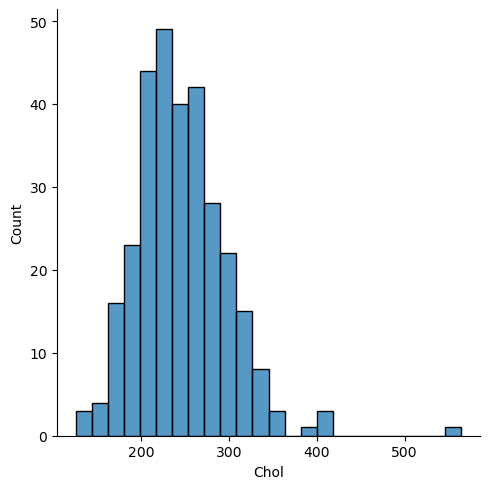

In [68]:
# Plot the distribution here:

sns.displot(df.Chol.dropna())

# Why is this a "histplot" and not a "distplot"?  
# According to the seaborn (sns) documentation, 
# the "distplot" is a depricated function and will be removed in a future version.
# So let's explore other options in this learning space.



<AxesSubplot:xlabel='Chol', ylabel='Count'>

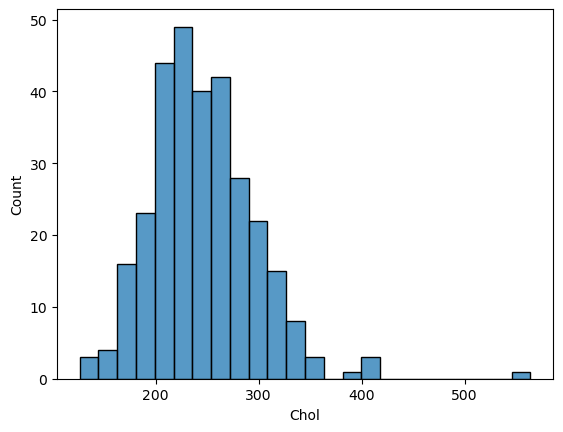

In [69]:
# Could also try to use 
sns.histplot(df.Chol.dropna())

In [70]:
# Do you see any outliers? 
#yes. some grouped around 400 and the one greater that 500

<AxesSubplot:xlabel='Chol', ylabel='Count'>

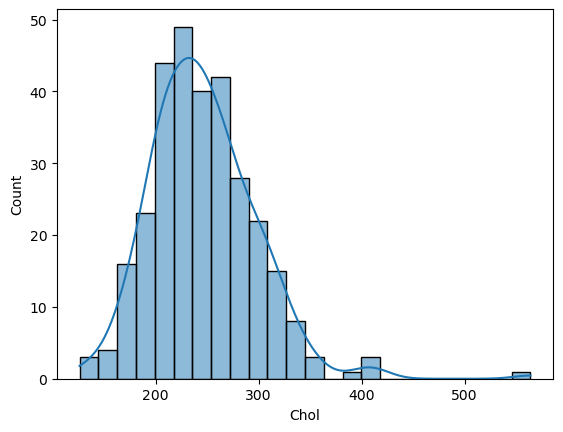

In [71]:
# Want the histogram with the standard deviation curve on the same plot? 

# Here is they syntax:
sns.histplot(data=df, x="Chol", kde=True)

[Documentation on the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to better understand the syntax.

**Part B:** Describe and Plot the Resting Heart Rate values

In [72]:
# code the describe() for RestBP
df['RestBP'].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestBP, dtype: float64

<AxesSubplot:xlabel='RestBP', ylabel='Count'>

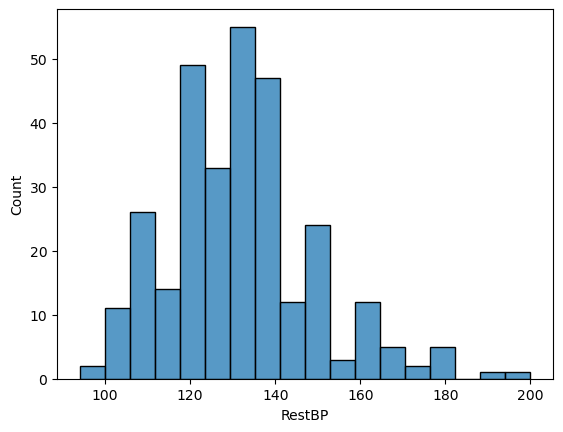

In [73]:
# Let's plot The resting heart rate, "RestBP".  
#You can choose to plot using "histplot" or "displot".  Your choice.
sns.histplot(df.RestBP.dropna())

<AxesSubplot:xlabel='RestBP', ylabel='Count'>

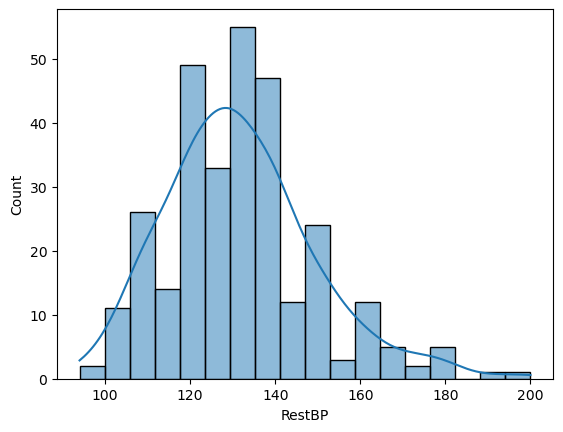

In [74]:
sns.histplot(data=df, x="RestBP", kde=True)

In [75]:
# Any outliers? yes. but i am unsure when reading the vaues here if we are seeing just
# systolic BPs or both systolic and diastolics. data would need cleaning to know best.

**Part C:** Describe and Plot the values you selected in Question 1 part c.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

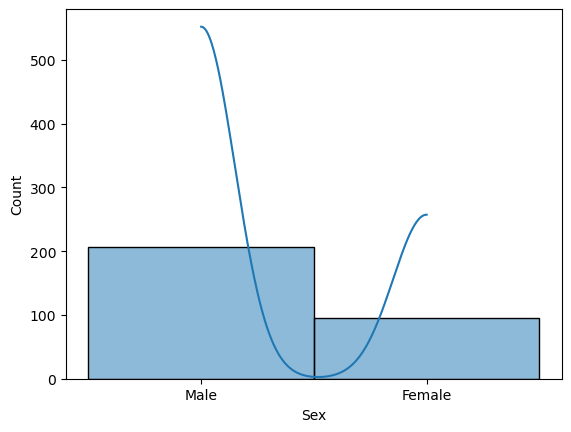

In [77]:
# Plot Part C here: 
sns.histplot(data=df, x="Sex", kde=True)

### Question 4: Find the mean of the RestBP and calculate the population proportion of the people who have the higher RestBP than the mean RestBP.

In [83]:
# Calculate the mean of the RestBp and print it
mean_rbp = df.RestBP.dropna().mean()
mean_rbp

131.60264900662253

In [84]:
# Question: Is the .dropna() siginificant or necessary for calculating the mean_rbp?
#yes. because a zero/null value could skew our mean. 
#we have already cleaned the data so it's not an issue, but it could be in other situations

In [86]:
# Calculate population proportion of people who have higher RestBP than the average
len(df[df['RestBP'] > mean_rbp])/len(df)

# Questions: 

# 1. Translate this line of code in plain English?
# len of dataframe of resting BPs greater than average resting BPs divided by length of dataframe
# 2.  Break this line and examine your results.  What did you change?  What happened?


0.4337748344370861

### Question 5: Plot the Cholesterol data against the age group

<AxesSubplot:xlabel='AgeGrp', ylabel='Chol'>

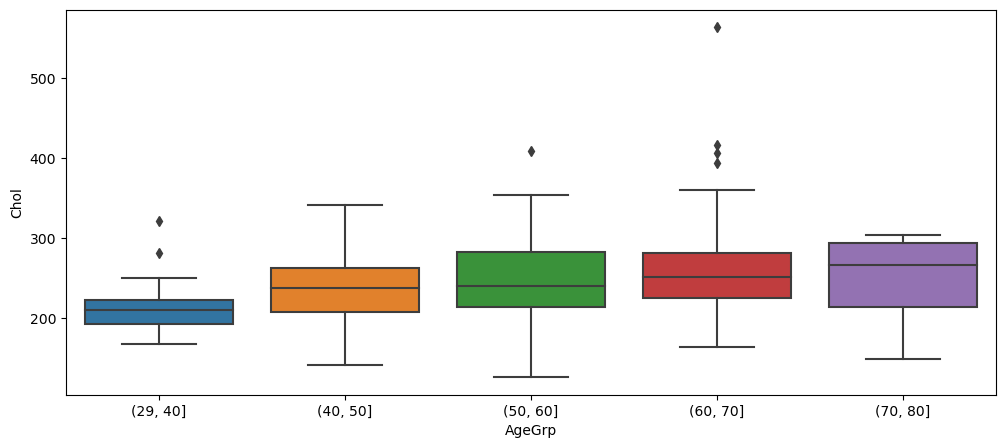

In [94]:
df["AgeGrp"]=pd.cut(df.Age, [29,40,50,60,70,80])
plt.figure(figsize=(12,5))
sns.boxplot(x = "AgeGrp", y = "Chol", data=df)

In [95]:
# Questions for you to answer:

# Looking at the code that was used to create the box plot, 
#   explain what the following code means in your own words:

# 1. pandas.cut(): 
# taking sections from the age section to great new sections

# 2. Looking at the cut() method signature, what is a "bin": 
# groupings for data to be filed in for use?

# 3. plt.figure():
# tells pandas the dimension of the plotted figure we want (len,height)

# 3 A - in the code above, what do the numbers in figsize mean?  What happens if you change them?
# (len,height) changes the proportion of the graph and boxplot

# 4. sns.boxplot(x = ??, y = ??, data= ??):
# tells pandas what kind of figure we want to make 
# what each axis should be and what dataframe to reference


<AxesSubplot:xlabel='agegrp', ylabel='Chol'>

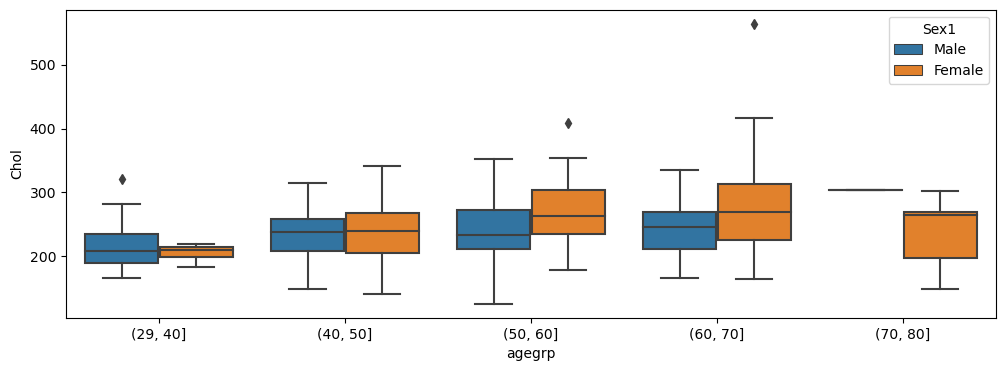

In [98]:
# Combine sex and cholesterol data here:
df["Sex1"] = df.Sex.replace({1: "Male", 0: "Female"})
plt.figure(figsize=(12, 4))
sns.boxplot(x = "agegrp", y = "Chol", hue = "Sex1", data=df)

# Why did the author run this: df["Sex1"] = df.Sex.replace({1: "Male", 0: "Female"})
# to make the data numerical and able to be combined with other numerical data in plots
# What does that line mean, in your own words:
# new series will be replace old values so male will be 1 and female 0.

# There is a new argument in the boxplot function.  Look up what "hue" means.
# hue tells pandas that there should be distinct colors for the values in series

<AxesSubplot:xlabel='Sex1', ylabel='Age'>

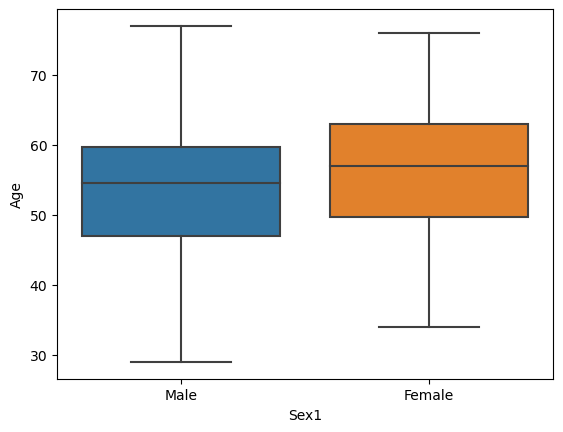

In [102]:
# How does the sns.boxplot(x = "Sex1", y = "Age", data=df) differ from the one in the cell above?
sns.boxplot(x = "Sex1", y = "Age", data=df)
# What information does this provide you?
# afab folks have higher cholesterol overall and especially as age increases, but because
# age skew of our data, we dont have a lot of data on younger AFAB or older AMAB people


### Question 6:  Make a chart to show the number of people having each type of chest pain

In [103]:
df.groupby("agegrp")["ChestPain"].value_counts().unstack()

ChestPain,asymptomatic,nonanginal,nontypical,typical
agegrp,,,,
"(29, 40]",6.0,2.0,6.0,3.0
"(40, 50]",29.0,20.0,25.0,2.0
"(50, 60]",65.0,20.0,34.0,10.0
"(60, 70]",41.0,5.0,19.0,8.0
"(70, 80]",2.0,2.0,2.0,NaN


In [107]:
# Run the following line of code:

df.groupby("agegrp")["ChestPain"].value_counts()

# Question:  
# 1. How does the output vary between these two lines?  
# the .unstack() puts it in an easy to read table (10/10 would recommend)

agegrp    ChestPain   
(29, 40]  asymptomatic     6
          nontypical       6
          typical          3
          nonanginal       2
(40, 50]  asymptomatic    29
          nontypical      25
          nonanginal      20
          typical          2
(50, 60]  asymptomatic    65
          nontypical      34
          nonanginal      20
          typical         10
(60, 70]  asymptomatic    41
          nontypical      19
          typical          8
          nonanginal       5
(70, 80]  asymptomatic     2
          nonanginal       2
          nontypical       2
Name: ChestPain, dtype: int64

### Question 7: Add on to your chart, but segregate by gender.

In [109]:
dx = df.dropna().groupby(["agegrp", "Sex1"])["ChestPain"].value_counts().unstack()
dx

ChestPain        asymptomatic  nonanginal  nontypical  typical
agegrp   Sex1                                                 
(29, 40] Female           1.0         1.0         3.0      NaN
         Male             5.0         1.0         3.0      3.0
(40, 50] Female           6.0         8.0         8.0      NaN
         Male            23.0        12.0        17.0      2.0
(50, 60] Female          15.0         6.0        12.0      2.0
         Male            50.0        14.0        22.0      8.0
(60, 70] Female          16.0         1.0        10.0      2.0
         Male            25.0         4.0         9.0      6.0
(70, 80] Female           1.0         2.0         2.0      NaN
         Male             1.0         NaN         NaN      NaN

### Question 8:  Present population proportion for each type of chest pain

In [112]:
dx = dx.apply(lambda x: x/x.sum(), axis=1)
dx

ChestPain        asymptomatic  nonanginal  nontypical   typical
agegrp   Sex1                                                  
(29, 40] Female      0.200000    0.200000    0.600000       NaN
         Male        0.416667    0.083333    0.250000  0.250000
(40, 50] Female      0.272727    0.363636    0.363636       NaN
         Male        0.425926    0.222222    0.314815  0.037037
(50, 60] Female      0.428571    0.171429    0.342857  0.057143
         Male        0.531915    0.148936    0.234043  0.085106
(60, 70] Female      0.551724    0.034483    0.344828  0.068966
         Male        0.568182    0.090909    0.204545  0.136364
(70, 80] Female      0.200000    0.400000    0.400000       NaN
         Male        1.000000         NaN         NaN       NaN

Note on your output, as we made this notebook, we discovered that the ariticle dataset had been cleaned prior to our usage.  The methods used were not disclosed, so we cleaned ourselves.  Which could explain the discrepencies in this chart.

In [114]:
# Questions: In your own words:

# 1. What does the apply() function do?
# appears to aplly methods to a whole set of data

# 2. What is lambda? 
# it something that can take multiple arguments and give one return? kind of unlear